In [1]:
import torch
import numpy as np
import os
import shap
from vgg import *

from dataset import *
from model import *



In [2]:
BATCH_SIZE = 128
NUM_CLASSES = 43

CHECKPOINT_PATH = os.path.join( 'checkpoint' , 'GTSRB_VGG_SE_11' )

dirs = os.listdir( CHECKPOINT_PATH )

latest_checkpoint = max(dirs)

checkpoint = torch.load( os.path.join(CHECKPOINT_PATH,latest_checkpoint) )

model_state = checkpoint['model_state_dict']
opt_state = checkpoint['optimizer_state_dict']
last_epoch = checkpoint['epoch']
loss = checkpoint['loss']

print(' [*] Model Restored from {} Epoch \n'.format(last_epoch) )

train_loader , val_loader , test_loader = get_loaders( batch_size=BATCH_SIZE )

net = VGG11( num_classes=NUM_CLASSES ).cuda()

net.load_state_dict(model_state)


 [*] Model Restored from 40 Epoch 



<All keys matched successfully>

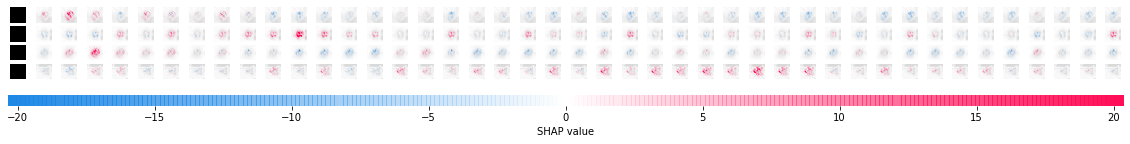

In [16]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

test_batch = next( iter(test_loader) )
x_test, _ = test_batch

train_batch = next( iter(train_loader) )
x_train , _ = train_batch

background = x_train[:100].to(device)
test_images = x_test[1:5].to(device)

e = shap.DeepExplainer(net, background)
shap_values = e.shap_values(test_images)

shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
test_numpy = np.swapaxes(np.swapaxes(test_images.cpu().numpy(), 1, -1), 1, 2)

shap.image_plot(shap_numpy, -test_numpy)